In [1]:
import sys
from datetime import datetime
import os
from os import mkdir
import matplotlib.pyplot as plt

from mpi4py import MPI
import numpy as np
from nvtx import annotate
import multiprocessing
import tomopy

from httomo.common import PipelineTasks
from httomo.data.hdf.loaders import standard_tomo
from httomo.data.hdf._utils.save import intermediate_dataset
from httomo.data.hdf._utils.reslice import reslice

In [23]:
# set I/O and other parameters
in_file = "/scratch/daniil/data/i12/360_scan_stripes/112482.nxs"
run_out_dir = os.path.join("/scratch/daniil/data/OUTPUT", f"{datetime.now().strftime('%d-%m-%Y_%H_%M_%S')}_output")

data_key = "/entry1/tomo_entry/data/data"
dimension = 1 # load chunks projection-wise
crop = 10 # crop the data if needed (around the mid slice)
pad = 0 # padding data parameter

comm = MPI.COMM_WORLD
if comm.rank == 0:
    mkdir(run_out_dir)
if comm.size == 1:
    ncore = multiprocessing.cpu_count() # use all available CPU cores if not an MPI run

The full dataset shape is (3751, 2160, 2560)
Cropped data shape is (3601, 216, 2560)
[0] Pad values are (0, 0).
[0] Data shape is (3601, 216, 2560) of type uint16


NameError: name 'mid' is not defined

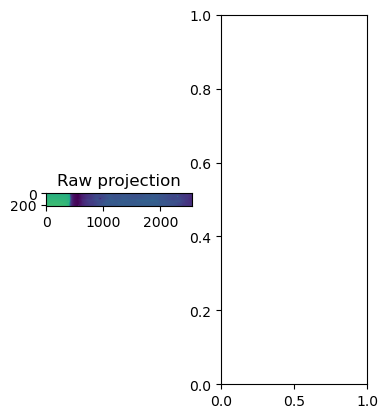

In [25]:
#data, flats, darks, angles, angles_total, detector_y, detector_x = standard_tomo(in_file, data_key, dimension, crop, pad, comm)


plt.figure()
plt.subplot(131)
plt.imshow(data[90,:,:])
plt.title('Raw projection')
plt.subplot(132)
plt.imshow(data[:,mid,:])
plt.title('Raw sinogram')
plt.subplot(133)
plt.imshow(flats[:,0,:])
plt.title('Flat field')
plt.show()


In [29]:
arr = [":","mid",":"]

In [30]:
print(arr[1])

mid
